In [ ]:
# Import packages and libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import callbacks, optimizers
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns


In [ ]:
#Import CIFAR-10 dataset from Keras datasets module
from keras.datasets import cifar10

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shapes of the loaded arrays
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


170498071/170498071 [==============================] - 13s 0us/step
x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 1)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


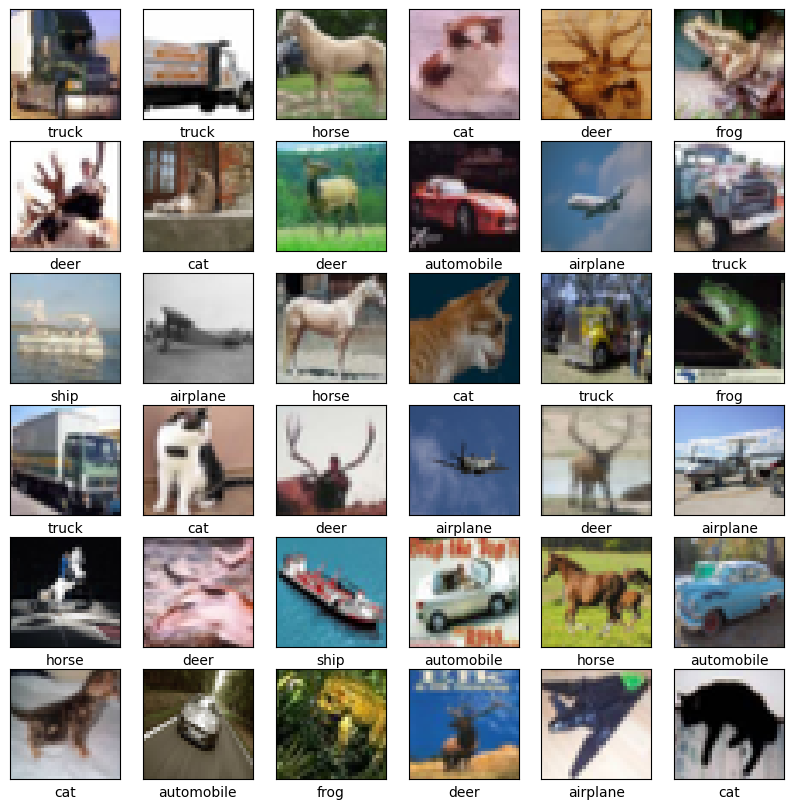

In [ ]:
#Show 36 random images
plt.figure(figsize=(10, 10))
random_inds = np.random.choice(len(x_train), 36)
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(x_train[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[image_ind][0]])  # Show labels as words

plt.show()

In [ ]:
#Normalize and convert images to float and convert labels to integers
x_train = (x_train / 255.).astype(np.float32)
y_train = y_train.astype(np.int64)
x_val = (x_val / 255.).astype(np.float32)
y_val = y_val.astype(np.int64)
x_test = (x_test / 255.).astype(np.float32)

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator (rescaling done previously)
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# No augmentation (rescaling done previously)
test_datagen = ImageDataGenerator()

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow(x_train,
                                     y_train,
                                     batch_size=32,
                                     shuffle=True)  # Shuffle the data

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = test_datagen.flow(x_val,
                                         y_val,
                                         batch_size=32,
                                         shuffle=False)

print("Found", len(x_train), "images belonging to", len(np.unique(y_train)), "classes.")
print("Found", len(x_val), "images belonging to", len(np.unique(y_val)), "classes.")

Found 40000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [ ]:
# One-hot encode the labels
y_test_cat = to_categorical(y_test)
y_val_cat = to_categorical(y_val)
y_train_cat = to_categorical(y_train)

print(y_test_cat)
print(y_val_cat)
print(y_train_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
#Define a cnn model
def build_cnn_model():
    cnn_model = tf.keras.Sequential([
        # First convolutional layer
        tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),

        # First max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # Second convolutional layer
        tf.keras.layers.Conv2D(8, (5, 5), strides=(1, 1), activation='relu'),

        # Second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return cnn_model



In [ ]:
#Build the cnn model
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(x_train[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())

1/1 [==============================] - 0s 60ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        1216      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 8)         3208      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 8)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 d

In [ ]:
#Compile the cnn model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the cnn model
history=cnn_model.fit(x_train, y_train_cat, validation_data=(x_val, y_val_cat), epochs=5, batch_size=32, verbose=2)

Epoch 1/5
1250/1250 - 6s - loss: 1.7217 - accuracy: 0.3676 - val_loss: 1.5237 - val_accuracy: 0.4434 - 6s/epoch - 5ms/step
Epoch 2/5
1250/1250 - 5s - loss: 1.4645 - accuracy: 0.4699 - val_loss: 1.3945 - val_accuracy: 0.4947 - 5s/epoch - 4ms/step
Epoch 3/5
1250/1250 - 4s - loss: 1.3585 - accuracy: 0.5117 - val_loss: 1.3225 - val_accuracy: 0.5201 - 4s/epoch - 3ms/step
Epoch 4/5
1250/1250 - 4s - loss: 1.2952 - accuracy: 0.5361 - val_loss: 1.2888 - val_accuracy: 0.5359 - 4s/epoch - 3ms/step
Epoch 5/5
1250/1250 - 6s - loss: 1.2500 - accuracy: 0.5538 - val_loss: 1.2708 - val_accuracy: 0.5525 - 6s/epoch - 5ms/step


In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.5465999841690063


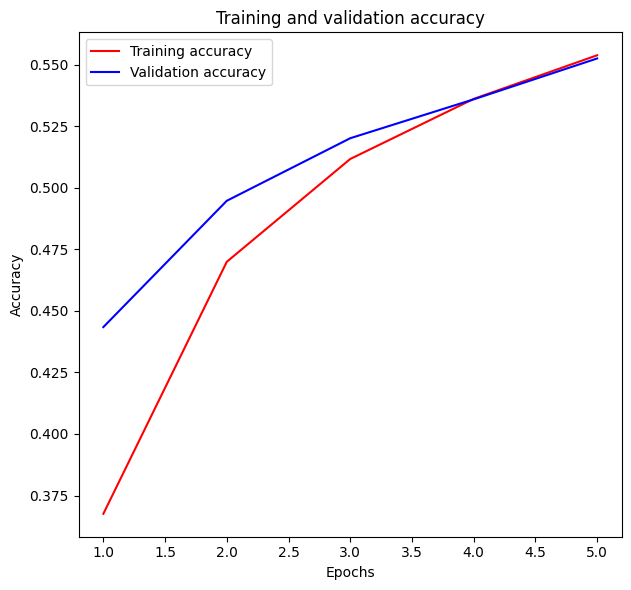

In [ ]:
#Plot validation and training accuracy over epochs
# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Increased the number of epochs to 100
#Fit the cnn model
history=cnn_model.fit(x_train, y_train_cat, validation_data=(x_val, y_val_cat), epochs=100, batch_size=32, verbose=2)

Epoch 1/100
1250/1250 - 6s - loss: 0.7547 - accuracy: 0.7320 - val_loss: 1.1705 - val_accuracy: 0.6151 - 6s/epoch - 5ms/step
Epoch 2/100
1250/1250 - 5s - loss: 0.7519 - accuracy: 0.7329 - val_loss: 1.1635 - val_accuracy: 0.6189 - 5s/epoch - 4ms/step
Epoch 3/100
1250/1250 - 5s - loss: 0.7388 - accuracy: 0.7359 - val_loss: 1.1478 - val_accuracy: 0.6268 - 5s/epoch - 4ms/step
Epoch 4/100
1250/1250 - 4s - loss: 0.7247 - accuracy: 0.7433 - val_loss: 1.1523 - val_accuracy: 0.6242 - 4s/epoch - 3ms/step
Epoch 5/100
1250/1250 - 4s - loss: 0.7205 - accuracy: 0.7423 - val_loss: 1.1461 - val_accuracy: 0.6323 - 4s/epoch - 3ms/step
Epoch 6/100
1250/1250 - 6s - loss: 0.7090 - accuracy: 0.7477 - val_loss: 1.1525 - val_accuracy: 0.6273 - 6s/epoch - 4ms/step
Epoch 7/100
1250/1250 - 4s - loss: 0.7000 - accuracy: 0.7490 - val_loss: 1.1819 - val_accuracy: 0.6313 - 4s/epoch - 3ms/step
Epoch 8/100
1250/1250 - 4s - loss: 0.6941 - accuracy: 0.7523 - val_loss: 1.2080 - val_accuracy: 0.6219 - 4s/epoch - 4ms/step


In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.5929999947547913


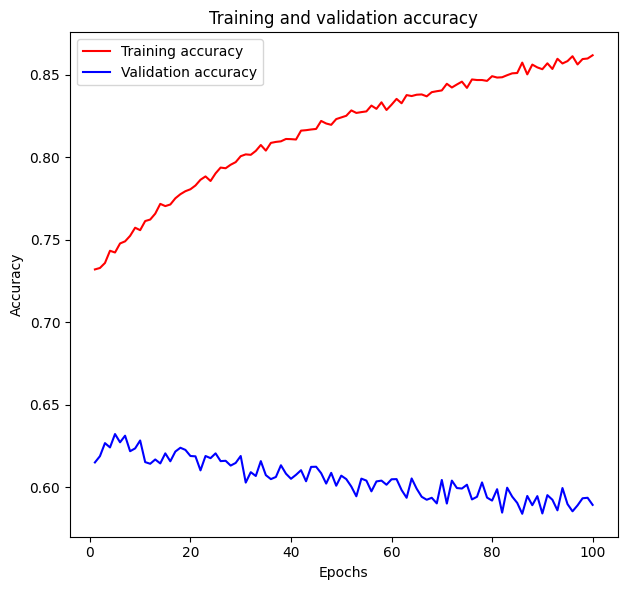

In [ ]:
#Plot validation and training accuracy over epochs
# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Set learning rate to 0.001, add early stopping
#Compile the cnn model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the cnn model

early_stop = callbacks.EarlyStopping(
    monitor ='val_loss',
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

history=cnn_model.fit(
    x_train,
    y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data = (x_val, y_val_cat),
    callbacks = [early_stop]
)


Epoch 1/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2152 - accuracy: 0.5673 - val_loss: 1.3053 - val_accuracy: 0.5410
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1843 - accuracy: 0.5757 - val_loss: 1.2726 - val_accuracy: 0.5481
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1564 - accuracy: 0.5906 - val_loss: 1.2528 - val_accuracy: 0.5578
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.1328 - accuracy: 0.5968 - val_loss: 1.2269 - val_accuracy: 0.5663
Epoch 5/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1140 - accuracy: 0.6046 - val_loss: 1.2202 - val_accuracy: 0.5744
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0865 - accuracy: 0.6116 - val_loss: 1.2096 - val_accuracy: 0.5713
Epoch 7/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0679 - accuracy: 0.6216 - val_loss: 1.1978 - val_ac

In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.5849000215530396


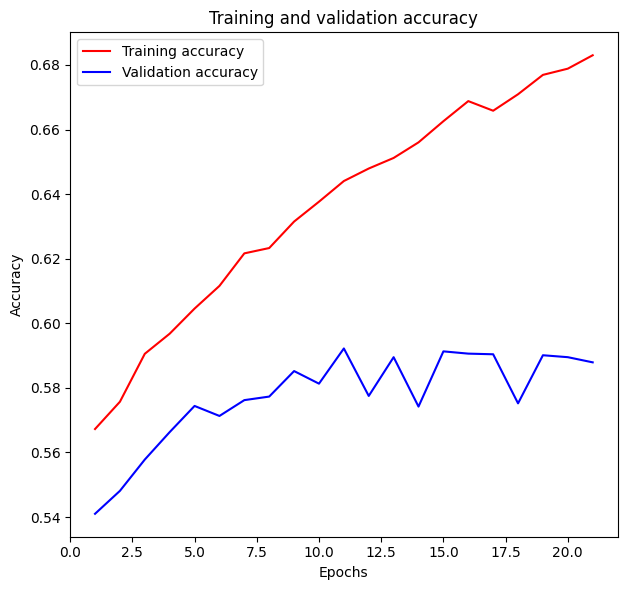

In [ ]:
#Plot validation and training accuracy over epochs
# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Set learning rate to 0.0001
#Compile the cnn model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the cnn model

early_stop = callbacks.EarlyStopping(
    monitor ='val_loss',
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

history=cnn_model.fit(
    x_train,
    y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data = (x_val, y_val_cat),
    callbacks = [early_stop]
)


Epoch 1/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8792 - accuracy: 0.6915 - val_loss: 1.1482 - val_accuracy: 0.6041
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8737 - accuracy: 0.6927 - val_loss: 1.1459 - val_accuracy: 0.6032
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8701 - accuracy: 0.6947 - val_loss: 1.1446 - val_accuracy: 0.6031
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8660 - accuracy: 0.6955 - val_loss: 1.1512 - val_accuracy: 0.6037
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8620 - accuracy: 0.6972 - val_loss: 1.1590 - val_accuracy: 0.6057
Epoch 6/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.8585 - accuracy: 0.6988 - val_loss: 1.1492 - val_accuracy: 0.6065
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8556 - accuracy: 0.6995 - val_loss: 1.1644 - val_ac

In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.5978000164031982


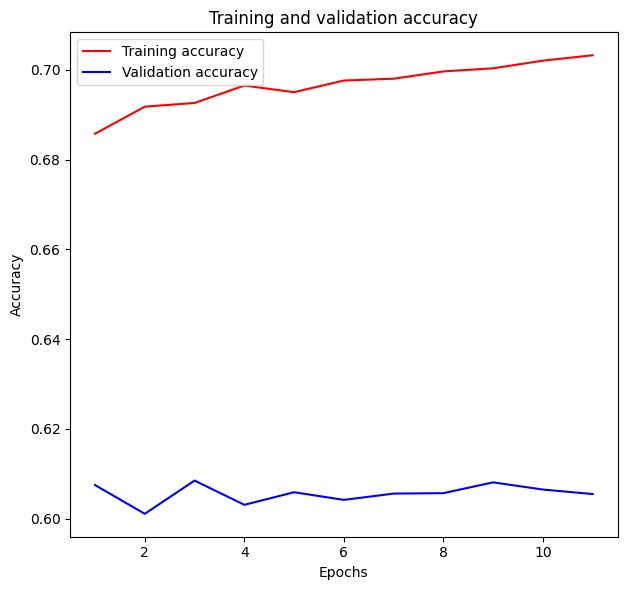

In [ ]:
#Plot validation and training accuracy over epochs
# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Different optimizer: RMSprop
#Compile the cnn model
cnn_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the cnn model

early_stop = callbacks.EarlyStopping(
    monitor ='val_loss',
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

history=cnn_model.fit(
    x_train,
    y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data = (x_val, y_val_cat),
    callbacks = [early_stop]
)


Epoch 1/100
1250/1250 [==============================] - 77s 62ms/step - loss: 0.8643 - accuracy: 0.6968 - val_loss: 1.1520 - val_accuracy: 0.6029
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8623 - accuracy: 0.6953 - val_loss: 1.1451 - val_accuracy: 0.6068
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8596 - accuracy: 0.6992 - val_loss: 1.1501 - val_accuracy: 0.6064
Epoch 4/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8564 - accuracy: 0.6998 - val_loss: 1.1506 - val_accuracy: 0.6028
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8537 - accuracy: 0.7009 - val_loss: 1.1558 - val_accuracy: 0.6064
Epoch 6/100
1250/1250 [==============================] - 6s 4ms/step - loss: 0.8503 - accuracy: 0.7005 - val_loss: 1.1497 - val_accuracy: 0.6061
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8481 - accuracy: 0.7027 - val_loss: 1.1503 - val_

In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.5995000004768372


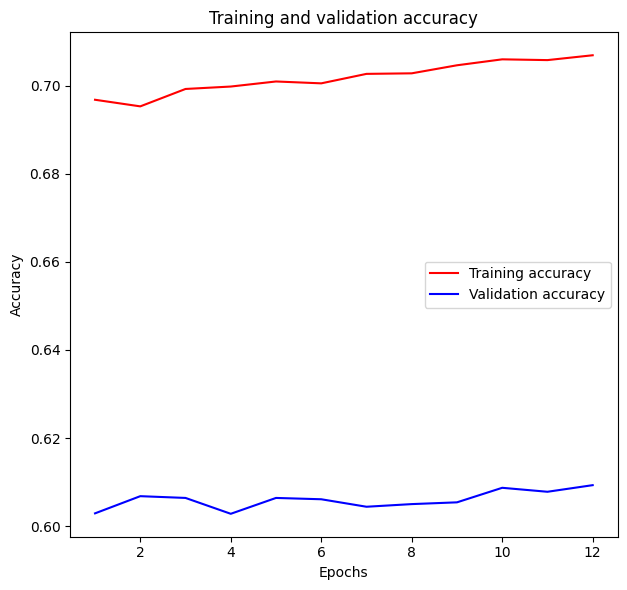

In [ ]:
#Plot validation and training accuracy over epochs
# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#2d architecture: add another convolutional layer

In [ ]:
#Define a cnn model
def build_cnn_model2():
    cnn_model2 = tf.keras.Sequential([
        # First convolutional layer
        tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),

        # First max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # Second convolutional layer
        tf.keras.layers.Conv2D(8, (5, 5), strides=(1, 1), activation='relu'),

        # Second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # Third convolutional layer
        tf.keras.layers.Conv2D(8, (5, 5), strides=(1, 1), activation='relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return cnn_model2

In [ ]:
#Build the cnn model
cnn_model2 = build_cnn_model2()
# Initialize the model by passing some data through
cnn_model2.predict(x_train[[0]])
# Print the summary of the layers in the model.
print(cnn_model2.summary())

1/1 [==============================] - 0s 66ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        1216      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 8)         3208      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 1, 8)           1608      
                                                                 
 f

In [ ]:
#Compile the cnn model
cnn_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the cnn model

early_stop = callbacks.EarlyStopping(
    monitor ='val_loss',
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

history=cnn_model2.fit(
    x_train,
    y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data = (x_val, y_val_cat),
    callbacks = [early_stop]
)

Epoch 1/100
1250/1250 [==============================] - 8s 5ms/step - loss: 1.8383 - accuracy: 0.3056 - val_loss: 1.5995 - val_accuracy: 0.3980
Epoch 2/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5554 - accuracy: 0.4242 - val_loss: 1.5072 - val_accuracy: 0.4411
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4653 - accuracy: 0.4568 - val_loss: 1.4310 - val_accuracy: 0.4725
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4027 - accuracy: 0.4827 - val_loss: 1.4573 - val_accuracy: 0.4643
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3725 - accuracy: 0.4952 - val_loss: 1.3649 - val_accuracy: 0.4995
Epoch 6/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3453 - accuracy: 0.5081 - val_loss: 1.3389 - val_accuracy: 0.5078
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3161 - accuracy: 0.5206 - val_loss: 1.3045 - val_ac

In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model2.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.6086000204086304


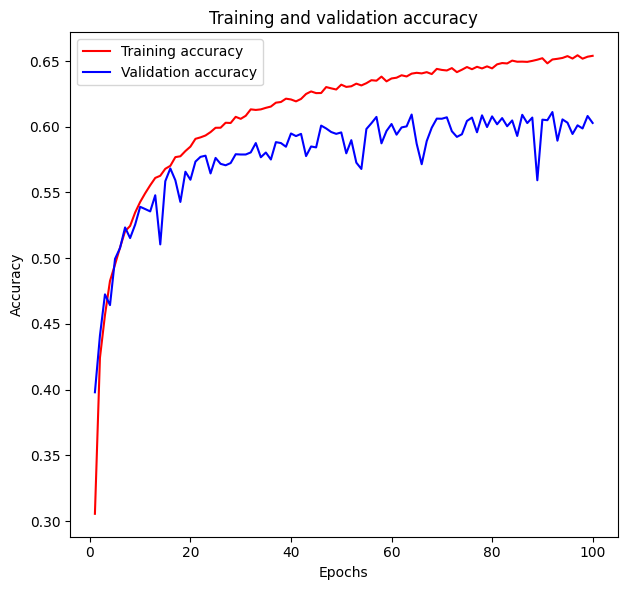

In [ ]:
#Plot validation and training accuracy over epochs
# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Add another Dense layer to the model with two convolutional layers
#Define a cnn model
def build_cnn_model3():
    cnn_model3 = tf.keras.Sequential([
        # First convolutional layer
        tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),

        # First max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # Second convolutional layer
        tf.keras.layers.Conv2D(8, (5, 5), strides=(1, 1), activation='relu'),

        # Second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # Third convolutional layer
        tf.keras.layers.Conv2D(8, (5, 5), strides=(1, 1), activation='relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return cnn_model3


In [ ]:
#Build the cnn model
cnn_model3 = build_cnn_model3()
# Initialize the model by passing some data through
cnn_model3.predict(x_train[[0]])
# Print the summary of the layers in the model.
print(cnn_model3.summary())

1/1 [==============================] - 0s 69ms/step
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 16)        1216      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 10, 10, 8)         3208      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 5, 5, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 1, 1, 8)           1608      
                                                                 
 

In [ ]:
#Compile the cnn model
cnn_model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the cnn model

early_stop = callbacks.EarlyStopping(
    monitor ='val_loss',
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

history=cnn_model3.fit(
    x_train,
    y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data = (x_val, y_val_cat),
    callbacks = [early_stop]
)

Epoch 1/100
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8306 - accuracy: 0.2934 - val_loss: 1.6540 - val_accuracy: 0.3699
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5635 - accuracy: 0.4106 - val_loss: 1.5193 - val_accuracy: 0.4370
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4809 - accuracy: 0.4497 - val_loss: 1.4844 - val_accuracy: 0.4530
Epoch 4/100
1250/1250 [==============================] - 6s 4ms/step - loss: 1.4302 - accuracy: 0.4714 - val_loss: 1.3982 - val_accuracy: 0.4791
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3951 - accuracy: 0.4860 - val_loss: 1.5127 - val_accuracy: 0.4494
Epoch 6/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3729 - accuracy: 0.4959 - val_loss: 1.3582 - val_accuracy: 0.5000
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3501 - accuracy: 0.5074 - val_loss: 1.3777 - val_ac

In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model3.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.598800003528595


In [ ]:
# Make predictions on the test data
y_pred = cnn_model3.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

313/313 [==============================] - 2s 5ms/step
Precision: 0.6003465823071226
Recall: 0.5988
F1-score: 0.5977338095950961


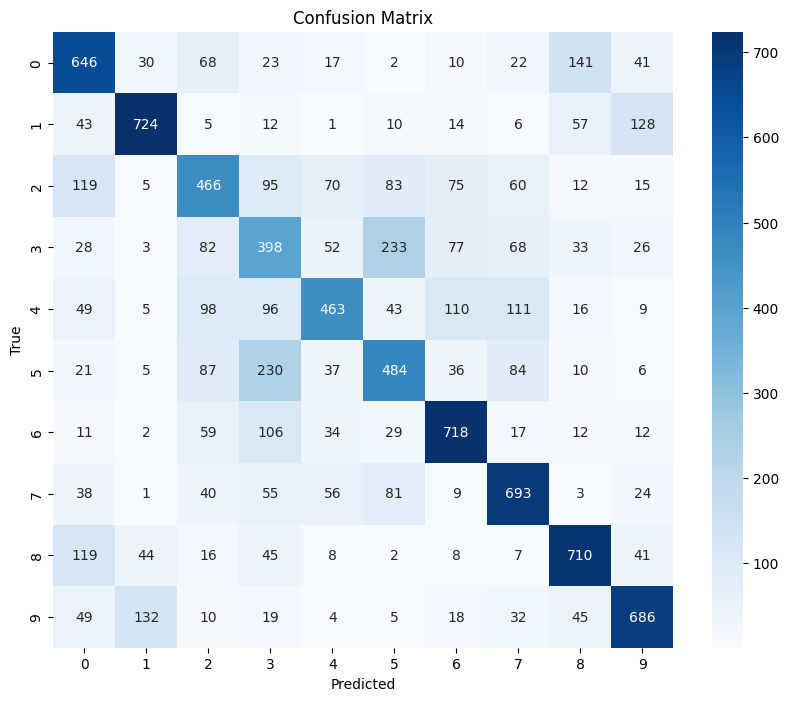

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#4. Double number of filters in convolutional layers and number of neurons in dense
#Define a cnn model
def build_cnn_model4():
    cnn_model4 = tf.keras.Sequential([
        # First convolutional layer
        tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),

        # First max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # Second convolutional layer
        tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu'),

        # Second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # Third convolutional layer
        tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),

        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return cnn_model4

In [ ]:
#Build the cnn model
cnn_model4 = build_cnn_model4()
# Initialize the model by passing some data through
build_cnn_model4.predict(x_train[[0]])
# Print the summary of the layers in the model.
print(cnn_model4.summary())

AttributeError: 'function' object has no attribute 'predict'

In [ ]:
#Compile the cnn model
cnn_model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the cnn model

early_stop = callbacks.EarlyStopping(
    monitor ='val_loss',
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

history=cnn_model4.fit(
    x_train,
    y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data = (x_val, y_val_cat),
    callbacks = [early_stop]
)

Epoch 1/100
1250/1250 [==============================] - 9s 6ms/step - loss: 1.6833 - accuracy: 0.3789 - val_loss: 1.4557 - val_accuracy: 0.4781
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4139 - accuracy: 0.4858 - val_loss: 1.3509 - val_accuracy: 0.5160
Epoch 3/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3202 - accuracy: 0.5253 - val_loss: 1.2960 - val_accuracy: 0.5323
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2548 - accuracy: 0.5497 - val_loss: 1.2795 - val_accuracy: 0.5400
Epoch 5/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2067 - accuracy: 0.5669 - val_loss: 1.2223 - val_accuracy: 0.5629
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1637 - accuracy: 0.5842 - val_loss: 1.1669 - val_accuracy: 0.5866
Epoch 7/100
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1353 - accuracy: 0.5932 - val_loss: 1.1661 - val_ac

In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model4.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.6359999775886536


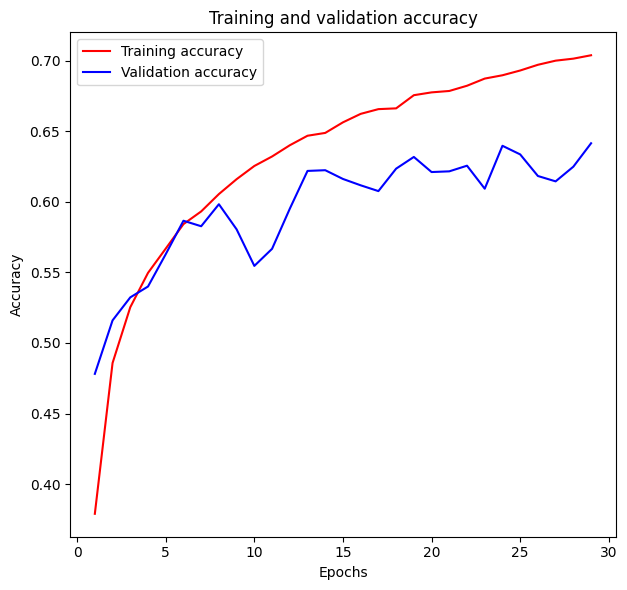

In [ ]:
#Plot validation and training accuracy over epochs
# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test data
y_pred = cnn_model4.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

313/313 [==============================] - 1s 2ms/step
Precision: 0.6354943109403477
Recall: 0.636
F1-score: 0.6327547886630462


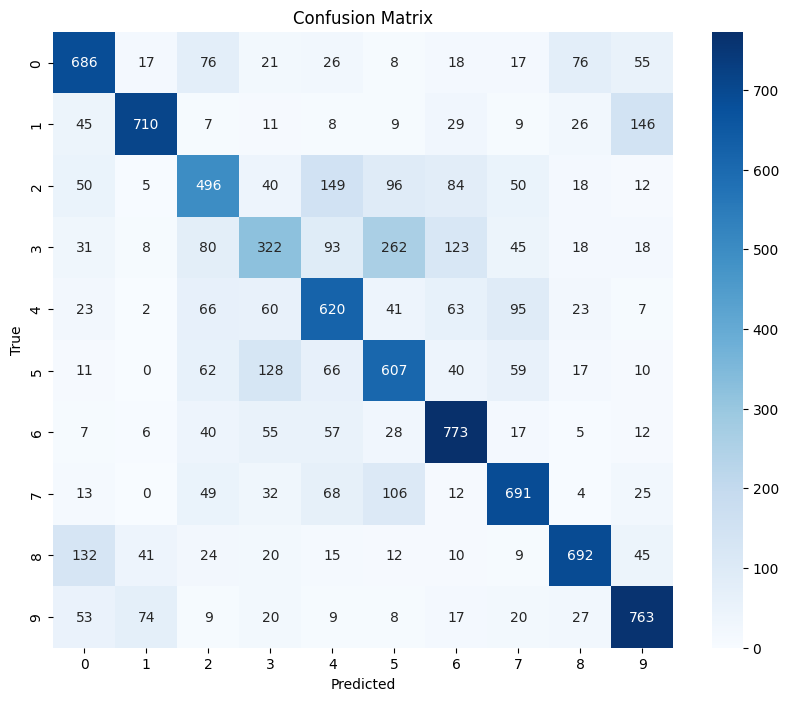

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#5. Add batch normalization
#Define a cnn model
def build_cnn_model5():
    cnn_model5 = tf.keras.Sequential([
        # First convolutional layer
        tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),

        # First max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        # Second convolutional layer
        tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu'),

        # Second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        #Add batch normaization
        tf.keras.layers.BatchNormalization(),

        # Third convolutional layer
        tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),

        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return cnn_model5


In [ ]:
#Build the cnn model
cnn_model5 = build_cnn_model5()
# Initialize the model by passing some data through
build_cnn_model5.predict(x_train[[0]])
# Print the summary of the layers in the model.
print(cnn_model5.summary())

AttributeError: 'function' object has no attribute 'predict'

In [ ]:
#Compile the cnn model
cnn_model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the cnn model

early_stop = callbacks.EarlyStopping(
    monitor ='val_loss',
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

history=cnn_model5.fit(
    x_train,
    y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data = (x_val, y_val_cat),
    callbacks = [early_stop]
)

Epoch 1/100
1250/1250 [==============================] - 9s 5ms/step - loss: 1.5409 - accuracy: 0.4355 - val_loss: 1.3576 - val_accuracy: 0.5149
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2754 - accuracy: 0.5402 - val_loss: 1.2924 - val_accuracy: 0.5378
Epoch 3/100
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1661 - accuracy: 0.5856 - val_loss: 1.2698 - val_accuracy: 0.5504
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0953 - accuracy: 0.6115 - val_loss: 1.8716 - val_accuracy: 0.4503
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0432 - accuracy: 0.6318 - val_loss: 1.4199 - val_accuracy: 0.5096
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0054 - accuracy: 0.6449 - val_loss: 1.0742 - val_accuracy: 0.6201
Epoch 7/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.9756 - accuracy: 0.6560 - val_loss: 1.2652 - val_ac

In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model5.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.6570000052452087


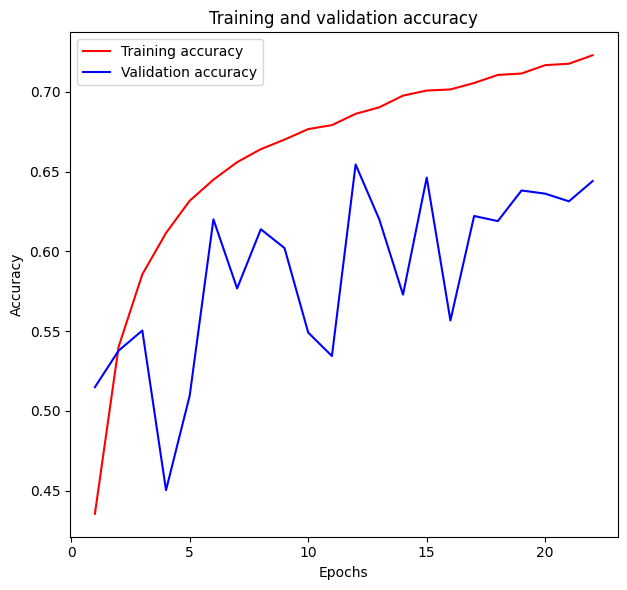

In [ ]:
#Plot validation and training accuracy over epochs
# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test data
y_pred = cnn_model5.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

313/313 [==============================] - 1s 2ms/step
Precision: 0.6737772807607156
Recall: 0.657
F1-score: 0.6573924821801201


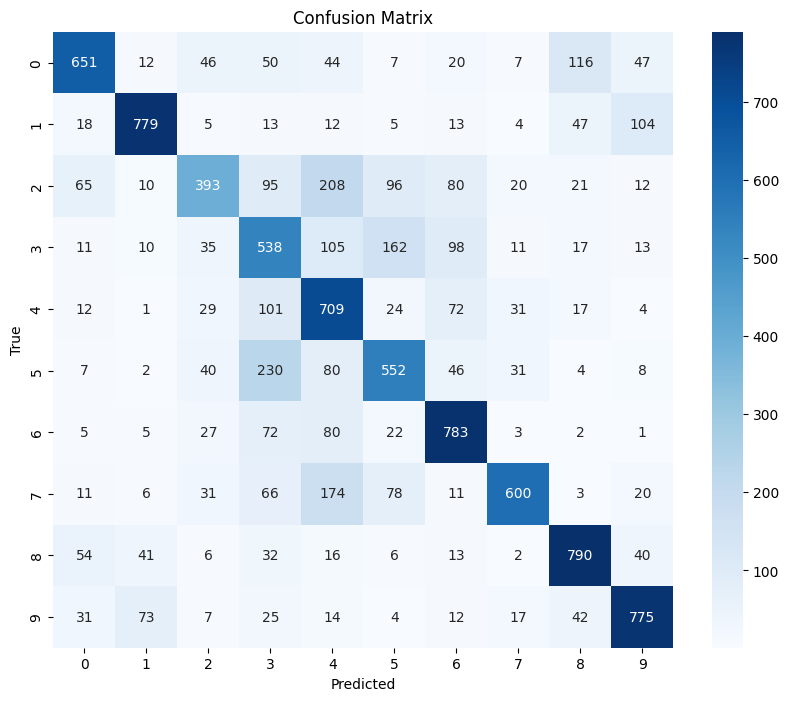

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#6. Add 3d MaxPool and batch normalizations after every layer
#Define a cnn model
def build_cnn_model6():
    cnn_model6 = tf.keras.Sequential([
        # First convolutional layer
        tf.keras.layers.Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),

        # First max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        #Add batch normaization
        tf.keras.layers.BatchNormalization(),

        # Second convolutional layer
        tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu'),

        # Second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        #Add batch normaization
        tf.keras.layers.BatchNormalization(),

        # Third convolutional layer
        tf.keras.layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu'),
        # Third max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

        #Add batch normaization
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=tf.nn.relu),

        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    return cnn_model6

In [ ]:
#Build the cnn model
cnn_model6 = build_cnn_model6()
# Initialize the model by passing some data through
build_cnn_model6.predict(x_train[[0]])
# Print the summary of the layers in the model.
print(cnn_model6.summary())

ValueError: Exception encountered when calling layer "max_pooling2d_10" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_10/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,16].

Call arguments received by layer "max_pooling2d_10" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 16), dtype=float32)

In [ ]:
#Compile the cnn model
cnn_model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the cnn model

early_stop = callbacks.EarlyStopping(
    monitor ='val_loss',
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

history=cnn_model6.fit(
    x_train,
    y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data = (x_val, y_val_cat),
    callbacks = [early_stop]
)

Epoch 1/100
1250/1250 [==============================] - 9s 5ms/step - loss: 1.4553 - accuracy: 0.4704 - val_loss: 1.8500 - val_accuracy: 0.3897
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2204 - accuracy: 0.5662 - val_loss: 1.4634 - val_accuracy: 0.5014
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1134 - accuracy: 0.6041 - val_loss: 1.2192 - val_accuracy: 0.5732
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0453 - accuracy: 0.6293 - val_loss: 1.2448 - val_accuracy: 0.5613
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0042 - accuracy: 0.6465 - val_loss: 1.3797 - val_accuracy: 0.5336
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9619 - accuracy: 0.6612 - val_loss: 1.2078 - val_accuracy: 0.5860
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9361 - accuracy: 0.6694 - val_loss: 1.1347 - val_ac

In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model6.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.6862999796867371


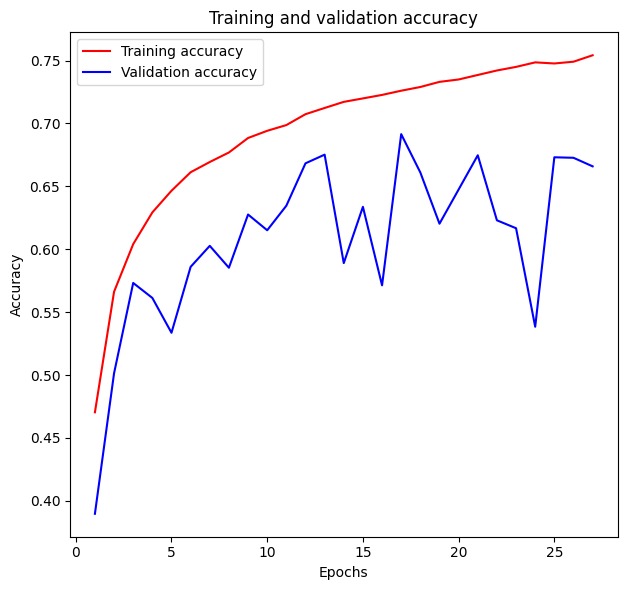

In [ ]:
#Plot validation and training accuracy over epochs
# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test data
y_pred = cnn_model6.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

313/313 [==============================] - 1s 2ms/step
Precision: 0.6883454822973448
Recall: 0.6863
F1-score: 0.6855134070230373


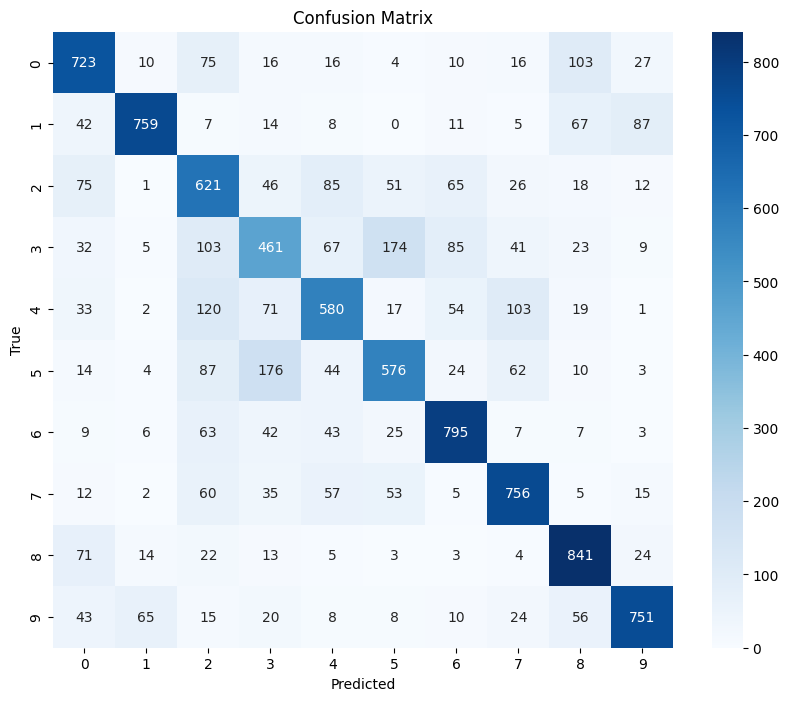

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#7. Architechture taken from the web
#Define a cnn model
def build_cnn_model7():
    cnn_model7 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(pool_size=(1, 1), strides=(1, 1)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        # Output layer
        tf.keras.layers.Dense(10, activation='softmax')

        ])

    return cnn_model7

In [ ]:
#Build the cnn model
cnn_model7 = build_cnn_model7()
# Initialize the model by passing some data through
build_cnn_model7.predict(x_train[[0]])
# Print the summary of the layers in the model.
print(cnn_model7.summary())

AttributeError: 'function' object has no attribute 'predict'

In [ ]:
#Compile the cnn model
cnn_model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Fit the cnn model

early_stop = callbacks.EarlyStopping(
    monitor ='val_loss',
    patience = 10,
    verbose = 1,
    restore_best_weights = True
)

history=cnn_model7.fit(
    x_train,
    y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data = (x_val, y_val_cat),
    callbacks = [early_stop]
)

Epoch 1/100
1250/1250 [==============================] - 19s 8ms/step - loss: 1.9579 - accuracy: 0.3180 - val_loss: 1.4052 - val_accuracy: 0.4775
Epoch 2/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4129 - accuracy: 0.4911 - val_loss: 1.2149 - val_accuracy: 0.5642
Epoch 3/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2390 - accuracy: 0.5663 - val_loss: 1.1838 - val_accuracy: 0.5931
Epoch 4/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1118 - accuracy: 0.6116 - val_loss: 0.9220 - val_accuracy: 0.6689
Epoch 5/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0229 - accuracy: 0.6478 - val_loss: 0.8778 - val_accuracy: 0.6952
Epoch 6/100
1250/1250 [==============================] - 9s 8ms/step - loss: 0.9631 - accuracy: 0.6704 - val_loss: 0.7838 - val_accuracy: 0.7234
Epoch 7/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9139 - accuracy: 0.6868 - val_loss: 0.8336 - val_

In [ ]:
#Evaluation on the test dataset
test_loss, test_acc = cnn_model7.evaluate(x_test, y_test_cat, verbose=0)

print('Test accuracy:', test_acc)

Test accuracy: 0.8170999884605408


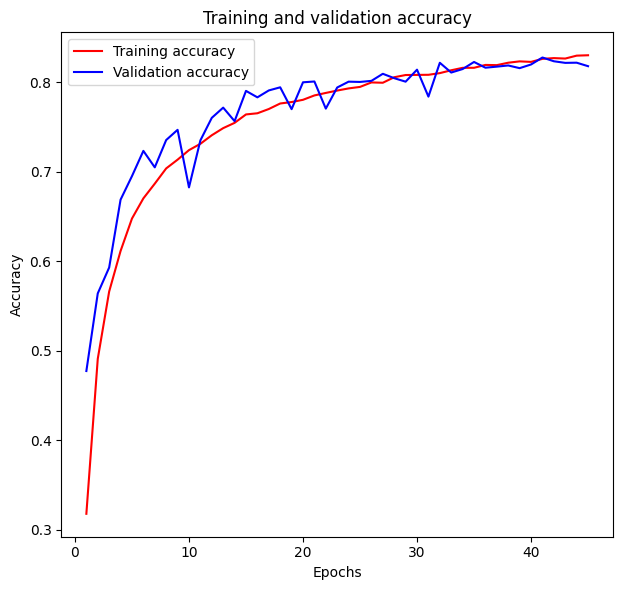

In [ ]:
#Plot validation and training accuracy over epochs
# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on the test data
y_pred = cnn_model7.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

313/313 [==============================] - 1s 2ms/step
Precision: 0.81859509019008
Recall: 0.8171
F1-score: 0.8154427643375857


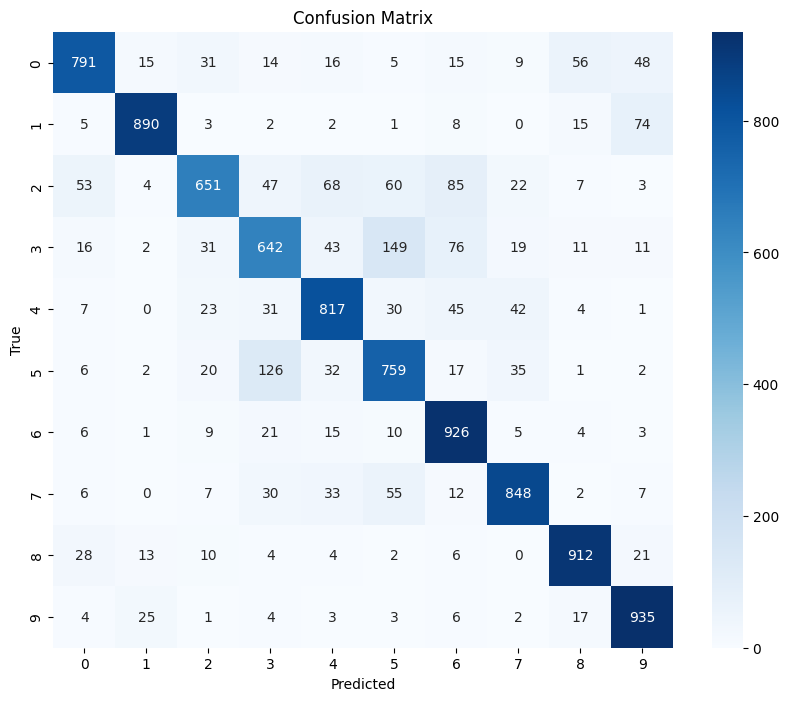

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()